# **Computational Drug Discovery [Part 1] Download Bioactivity Data**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

---

## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [4]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl.metadata (1.4 kB)
  Using cached requests_cache-1.2.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached cattrs-25.2.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached url_normalize-2.2.1-py3-none-any.whl.metadata (5.6 kB)
Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
Using cached requests_cache-1.2.1-py3-none-any.whl (61 kB)
Using cached cattrs-25.2.0-py3-none-any.whl (70 kB)
Using cached url_normalize-2.2.1-py3-none-any.whl (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [chembl_webresource_client]


## **Importing libraries**

In [70]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for coronavirus**

In [6]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('hiv-1 Reverse transcriptase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Human immunodeficiency virus 2,Reverse transcriptase,37.0,False,CHEMBL1681630,"[{'accession': 'Q06347', 'component_descriptio...",SINGLE PROTEIN,11709.0
1,[],Human immunodeficiency virus 1,Reverse transcriptase,37.0,False,CHEMBL2366516,"[{'accession': 'Q9WKE8', 'component_descriptio...",SINGLE PROTEIN,11676.0
2,[],Moloney murine leukemia virus,Reverse transcriptase,32.0,False,CHEMBL4523944,"[{'accession': 'Q83371', 'component_descriptio...",SINGLE PROTEIN,11801.0
3,[],Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,31.0,False,CHEMBL247,"[{'accession': 'Q72547', 'component_descriptio...",SINGLE PROTEIN,11676.0
4,[],Homo sapiens,Telomerase reverse transcriptase,29.0,False,CHEMBL2916,"[{'accession': 'O14746', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
4055,[],Mus musculus,Inhibitor of nuclear factor kappa-B kinase sub...,0.0,False,CHEMBL4296092,"[{'accession': 'Q60680', 'component_descriptio...",PROTEIN COMPLEX,10090.0
4056,[],Zika virus,Genome polyprotein,0.0,False,CHEMBL4523307,"[{'accession': 'Q32ZE1', 'component_descriptio...",SINGLE PROTEIN,64320.0
4057,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,0.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049.0
4058,[],Yellow fever virus (strain 17D vaccine) (YFV),Genome polyprotein,0.0,False,CHEMBL4523585,"[{'accession': 'P03314', 'component_descriptio...",SINGLE PROTEIN,11090.0


### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase* (fifth entry)**

We will assign the fifth entry (which corresponds to the target protein, *coronavirus 3C-like proteinase*) to the ***selected_target*** variable

In [7]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL247'

Here, we will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [12]:
res = activity.filter(target_chembl_id=selected_target)
df = pd.DataFrame(res)

if not df.empty:
    print(df.columns.tolist())
    print(df["standard_type"].unique() if "standard_type" in df.columns else "No standard_type column")
else:
    print("No bioactivity data returned for this target.")


['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']
['IC50' 'Ki' 'Km' 'ED50' 'SI' 'Inhibition' 'IC95' 'IC90' 'Activity' 'EC50'
 'CC50' 'Selectivity index' 'ID50' 'Concentration' 'Initial activity' 'NS'
 'NT' 'Control' 'Kpol

In [9]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [10]:
df = pd.DataFrame.from_dict(res)

In [11]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32097,[],CHEMBL798926,Inhibition of purified recombinant HIV-1 rever...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,10.0
1,None,Not Determined,32106,[],CHEMBL798927,Inhibitory activity of compound against purifi...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,None
2,None,None,32524,[],CHEMBL802044,Inhibition of HIV-1 reverse transcriptase (HIV...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,Log IC50,None,UO_0000065,None,-6.34


In [13]:
df.standard_type.unique()

array(['IC50', 'Ki', 'Km', 'ED50', 'SI', 'Inhibition', 'IC95', 'IC90',
       'Activity', 'EC50', 'CC50', 'Selectivity index', 'ID50',
       'Concentration', 'Initial activity', 'NS', 'NT', 'Control', 'Kpol',
       'Kd', 'Efficiency', 'CD50', 'C90', 'Cell viability', 'Protection',
       'Ratio', 'ND', 'EC90', 'Fold increase', 'I50', 'Kcat/Km',
       'Ratio Ki', 'log(1/C)', 'INH', 'Ka', 'Kcat', 'Ki/Km', 'FC',
       'Ratio IC50', 'Selectivity ratio', 'K', 'Vmax', 'Vmax/Km',
       'Delta Tm', 'pID50', 'Ratio EC50', 'pIC50', 'Vmax(app)', 'CI',
       'TDI'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [14]:
df.to_csv('bioactivity_data.csv', index=False)

## **Copying files to Google Drive**

Firstly, we need to mount the Google Drive into Colab so that we can have access to our Google adrive from within Colab.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


Next, we create a **data** folder in our **Colab Notebooks** folder on Google Drive.

In [16]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data’: File exists


In [17]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [18]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

total 12148
-rw------- 1 root root 11165052 Sep  1 05:01 bioactivity_data.csv
-rw------- 1 root root  1274339 Aug 31 23:42 bioactivity_preprocessed_data.csv


Let's see the CSV files that we have so far.

In [19]:
! ls

acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
bioactivity_data.csv
bioactivity_preprocessed_data.csv
gdrive
HIV1_RT_descriptors1.csv
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
Miniconda3-latest-Linux-x86_64.sh
Miniconda3-py37_4.8.2-Linux-x86_64.sh
molecule.smi
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
results.zip
sample_data


Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [20]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,32097,[],CHEMBL798926,Inhibition of purified recombinant HIV-1 reverse transcriptase,B,,,BAO_0000190,BAO_0000357,single protein format,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,,,CHEMBL1131738,Bioorg Med Chem Lett,1999,,CHEMBL296346,,CHEMBL296346,,0,http://www.openphacts.org/units/Nanomolar,66206,>,1,1,>,,IC50,nM,,10000

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [21]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32097,[],CHEMBL798926,Inhibition of purified recombinant HIV-1 rever...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,32524,[],CHEMBL802044,Inhibition of HIV-1 reverse transcriptase (HIV...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,Log IC50,None,UO_0000065,None,-6.34
3,None,None,33653,[],CHEMBL802598,Inhibitory activity against HIV-1 Reverse tran...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,34814,[],CHEMBL800982,Inhibitory concentration against HIV-1 replica...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,32.1
5,None,None,34815,[],CHEMBL800982,Inhibitory concentration against HIV-1 replica...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18860,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25726549,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5392070,Inhibition of HIV-1 RNase H using 5'-GAUCUGAGC...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,64.0
18861,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25726550,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5392070,Inhibition of HIV-1 RNase H using 5'-GAUCUGAGC...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,8.1
18862,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25726551,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5392070,Inhibition of HIV-1 RNase H using 5'-GAUCUGAGC...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,44.0
18866,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25726561,[],CHEMBL5392074,Inhibition of HIV-1 RNase H activity,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,2.0


Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [22]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [23]:
df2.molecule_chembl_id

,molecule_chembl_id
0,CHEMBL296346
2,CHEMBL318730
3,CHEMBL303928
4,CHEMBL68175
5,CHEMBL69775
...,...
18860,CHEMBL2037378
18861,CHEMBL5413305
18862,CHEMBL5416177
18866,CHEMBL5407832


### **Iterate the *molecule_chembl_id* to a list**

In [24]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [25]:
mol_cid

['CHEMBL296346',
 'CHEMBL318730',
 'CHEMBL303928',
 'CHEMBL68175',
 'CHEMBL69775',
 'CHEMBL431274',
 'CHEMBL68933',
 'CHEMBL69566',
 'CHEMBL67451',
 'CHEMBL121835',
 'CHEMBL125510',
 'CHEMBL125873',
 'CHEMBL223228',
 'CHEMBL66043',
 'CHEMBL69275',
 'CHEMBL57',
 'CHEMBL288626',
 'CHEMBL420367',
 'CHEMBL69934',
 'CHEMBL340255',
 'CHEMBL85975',
 'CHEMBL593',
 'CHEMBL66434',
 'CHEMBL57',
 'CHEMBL287978',
 'CHEMBL67675',
 'CHEMBL303273',
 'CHEMBL66016',
 'CHEMBL308644',
 'CHEMBL123968',
 'CHEMBL35033',
 'CHEMBL125702',
 'CHEMBL40625',
 'CHEMBL66155',
 'CHEMBL415320',
 'CHEMBL410036',
 'CHEMBL307994',
 'CHEMBL303015',
 'CHEMBL330537',
 'CHEMBL296092',
 'CHEMBL46961',
 'CHEMBL86064',
 'CHEMBL145297',
 'CHEMBL145297',
 'CHEMBL145297',
 'CHEMBL593',
 'CHEMBL69657',
 'CHEMBL123735',
 'CHEMBL304331',
 'CHEMBL304826',
 'CHEMBL40642',
 'CHEMBL305070',
 'CHEMBL40631',
 'CHEMBL338129',
 'CHEMBL335538',
 'CHEMBL335538',
 'CHEMBL335538',
 'CHEMBL240416',
 'CHEMBL295585',
 'CHEMBL66404',
 'CHEMBL302788'

### **Iterate *canonical_smiles* to a list**

In [26]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [27]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [28]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [29]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,10000.0
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,100000.0
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,32100.0
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,12600.0
...,...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,inactive,64000.0
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,intermediate,8100.0
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,inactive,44000.0
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,intermediate,2000.0


### **Alternative method**

In [30]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.0
2,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09
3,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.0
4,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.0
5,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.0
...,...,...,...
18860,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,64000.0
18861,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,8100.0
18862,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,44000.0
18866,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,2000.0


In [31]:
pd.concat([df3,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.0,inactive
2,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09,inactive
3,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.0,inactive
4,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.0,inactive
5,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.0,active
...,...,...,...,...
17407,NaN,NaN,NaN,active
17408,NaN,NaN,NaN,active
17409,NaN,NaN,NaN,active
17463,NaN,NaN,NaN,active


Saves dataframe to CSV file

In [32]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [33]:
! ls -l

total 264088
-rw-r--r-- 1 root root    655414 Sep  1 03:40 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root  11165052 Sep  1 05:01 bioactivity_data.csv
-rw-r--r-- 1 root root   1274339 Sep  1 05:02 bioactivity_preprocessed_data.csv
drwx------ 5 root root      4096 Sep  1 05:01 gdrive
-rw-r--r-- 1 root root   2339414 Sep  1 04:03 HIV1_RT_descriptors1.csv
-rw-r--r-- 1 root root        95 Sep  1 02:43 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root        93 Sep  1 02:41 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root       104 Sep  1 02:59 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root       101 Sep  1 02:53 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root       109 Sep  1 02:38 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 162129736 Aug 25 21:03 Miniconda3-latest-Linux-x86_64.sh
-rwxr-xr-x 1 root root  85055499 Feb 13  2025 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   1166383 Sep  1 04:04 molecule.smi
-rw-r--r-- 1 root root     14067 Se

Let's copy to the Google Drive

In [34]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [35]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


---

In [36]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-09-01 05:03:07--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   135MB/s    in 0.6s    

2025-09-01 05:03:07 (135 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::openssl==3.0.17=h5eee18b_0
  - defaults/linux-64::pydantic==2.11.7=py313h06a4308_0
  - defaults/linux-64::

In [37]:
import pandas as pd

In [38]:
# 1️⃣ Install Miniconda
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# 2️⃣ Add Conda to PATH
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

# 3️⃣ Install RDKit from conda-forge
!conda install -c conda-forge rdkit -y


--2025-09-01 05:04:44--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local
Jupyter detected...

CondaToSNonInteractiv

In [39]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [59]:
!pip install numpy
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 85.5 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi


In [60]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [61]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        if pd.isna(elem):  # skip NaN values
            continue
        mol = Chem.MolFromSmiles(str(elem))  # force to string
        if mol is not None:  # skip invalid molecules
            moldata.append(mol)

    baseData = []
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = [desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors]
        baseData.append(row)

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [47]:
df_lipinski = lipinski(df.canonical_smiles)

In [48]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,331.239,1.42020,2,4
1,292.382,4.42332,2,3
2,247.279,1.13990,3,4
3,257.337,2.28230,1,3
4,285.391,2.91840,1,3
...,...,...,...,...
17511,537.433,1.73200,8,10
17512,539.405,1.00780,9,11
17513,495.396,1.55460,8,10
17514,862.746,-1.09560,12,18


In [49]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.00
...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,64000.00
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,8100.00
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,44000.00
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,2000.00


In [50]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [51]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.00,331.239,1.42020,2.0,4.0
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09,292.382,4.42332,2.0,3.0
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.00,247.279,1.13990,3.0,4.0
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.00,257.337,2.28230,1.0,3.0
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.00,285.391,2.91840,1.0,3.0
...,...,...,...,...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,64000.00,862.746,-1.09560,12.0,18.0
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,8100.00,NaN,NaN,NaN,NaN
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,44000.00,NaN,NaN,NaN,NaN
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,2000.00,NaN,NaN,NaN,NaN


In [71]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nM → M
        if molar <= 0:
            pIC50.append(np.nan)  # Assign NaN instead of inf
        else:
            pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x


In [72]:
df_final = df_final.dropna(subset=['pIC50'])

NameError: name 'df_final' is not defined

In [73]:
print("Zeros in standard_value_norm:", (df_combined['standard_value_norm'] == 0).sum())
print("Negatives in standard_value_norm:", (df_combined['standard_value_norm'] < 0).sum())

KeyError: 'standard_value_norm'

In [74]:
df_final = df_final[df_final['standard_value_norm'] > 0]

NameError: name 'df_final' is not defined

In [75]:
print(df_final.columns)

NameError: name 'df_final' is not defined

In [76]:
df_combined.standard_value.describe()

,standard_value
count,1.752000e+04
mean,4.320536e+04
std,5.869803e+05
min,-1.580000e+01
25%,2.320000e+01
50%,2.000000e+02
75%,4.172300e+03
max,5.229600e+07


In [77]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [78]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [79]:
def norm_value(input_df):
    norm = []

    for i in input_df['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input_df['standard_value_norm'] = norm
    x = input_df.drop('standard_value', axis=1)

    return x


In [80]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,331.239,1.42020,2.0,4.0,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,292.382,4.42332,2.0,3.0,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,247.279,1.13990,3.0,4.0,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,257.337,2.28230,1.0,3.0,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,285.391,2.91840,1.0,3.0,12600.00
...,...,...,...,...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,862.746,-1.09560,12.0,18.0,64000.00
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,NaN,NaN,NaN,NaN,8100.00
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,NaN,NaN,NaN,NaN,44000.00
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,NaN,NaN,NaN,NaN,2000.00


In [81]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.752000e+04
mean,4.320536e+04
std,5.869803e+05
min,-1.580000e+01
25%,2.320000e+01
50%,2.000000e+02
75%,4.172300e+03
max,5.229600e+07


In [82]:
#the correct way to normalize it

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['standard_value_norm'] = scaler.fit_transform(df[['standard_value']])



In [83]:
print(df.columns)

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'standard_value_norm'],
      dtype='object')


In [84]:
df_norm['standard_value_norm'].describe()

,standard_value_norm
count,1.752000e+04
mean,4.320536e+04
std,5.869803e+05
min,-1.580000e+01
25%,2.320000e+01
50%,2.000000e+02
75%,4.172300e+03
max,5.229600e+07


In [85]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,331.239,1.42020,2.0,4.0,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,292.382,4.42332,2.0,3.0,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,247.279,1.13990,3.0,4.0,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,257.337,2.28230,1.0,3.0,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,285.391,2.91840,1.0,3.0,4.899629
...,...,...,...,...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,862.746,-1.09560,12.0,18.0,4.193820
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,NaN,NaN,NaN,NaN,5.091515
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,NaN,NaN,NaN,NaN,4.356547
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,NaN,NaN,NaN,NaN,5.698970


In [86]:
df_final.pIC50.describe()

,pIC50
count,17344.000000
mean,6.552686
std,1.609976
min,1.281532
25%,5.366532
50%,6.698970
75%,7.591802
max,13.301030


In [87]:
df_norm = df_norm[df_norm['standard_value_norm'] > 0]  # drop invalids
# or
df_norm['standard_value_norm'] = df_norm['standard_value_norm'].clip(lower=1e-9)


/tmp/ipython-input-3060992501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['standard_value_norm'] = df_norm['standard_value_norm'].clip(lower=1e-9)


In [88]:
import numpy as np

df_norm['pIC50'] = -np.log10(df_norm['standard_value_norm'])


/tmp/ipython-input-3007704015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['pIC50'] = -np.log10(df_norm['standard_value_norm'])


In [89]:
df_norm['pIC50'].describe()

,pIC50
count,17344.000000
mean,-2.447314
std,1.609976
min,-7.718468
25%,-3.633468
50%,-2.301030
75%,-1.408198
max,4.301030


In [90]:
df_raw = df.copy()

In [91]:
# Scaling
scaler = MinMaxScaler()
df['standard_value_norm'] = scaler.fit_transform(df[['standard_value']])

# pIC50 (only once, from the raw IC50 column in nM or M)
df['pIC50'] = -np.log10(df['standard_value'] * (10**-9))  # if IC50 is in nM


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [92]:
print(df[['standard_value', 'standard_value_norm', 'pIC50']].head())

   standard_value  standard_value_norm     pIC50
0        10000.00             0.000192  5.000000
1          457.09             0.000009  6.339998
2       100000.00             0.001912  4.000000
3        32100.00             0.000614  4.493495
4        12600.00             0.000241  4.899629


In [93]:
def classify_activity(pIC50):
    if pIC50 >= 6:
        return 'active'
    elif pIC50 <= 5:
        return 'inactive'
    else:
        return 'intermediate'

df_final['bioactivity_class'] = df_final['pIC50'].apply(classify_activity)

In [94]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,bioactivity_class
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,331.239,1.42020,2.0,4.0,5.000000,inactive
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,292.382,4.42332,2.0,3.0,6.339998,active
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,247.279,1.13990,3.0,4.0,4.000000,inactive
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,257.337,2.28230,1.0,3.0,4.493495,inactive
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,285.391,2.91840,1.0,3.0,4.899629,inactive
...,...,...,...,...,...,...,...,...
17509,CHEMBL5413115,Nc1ccncc1Br,290.319,1.54500,1.0,6.0,2.677781,inactive
17510,CHEMBL452901,NCCc1c(F)cccc1Cl,246.222,1.17680,3.0,5.0,2.677781,inactive
17511,CHEMBL5405971,CC(C)c1cn(COCc2ccccc2)c(=O)[nH]c1=O,537.433,1.73200,8.0,10.0,7.397940,active
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,862.746,-1.09560,12.0,18.0,4.193820,inactive


In [95]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

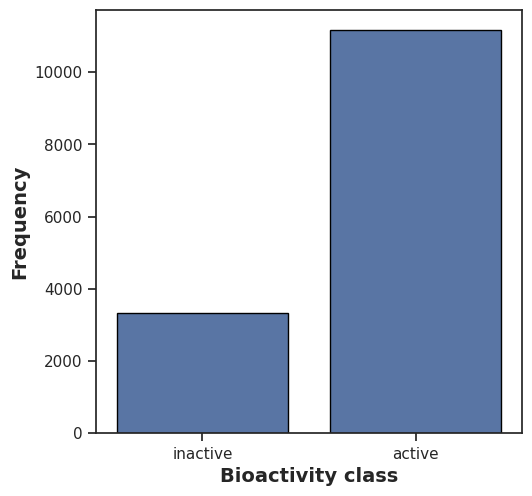

In [96]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [97]:
df_2class = df_final[df_final['bioactivity_class'].isin(['active', 'inactive'])]

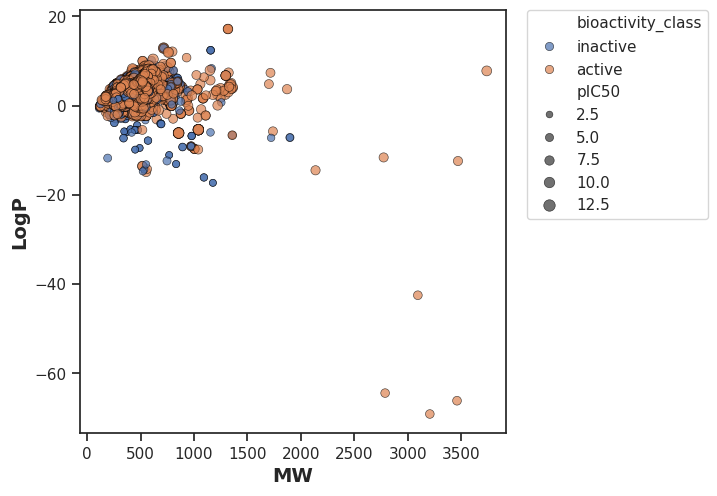

In [98]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

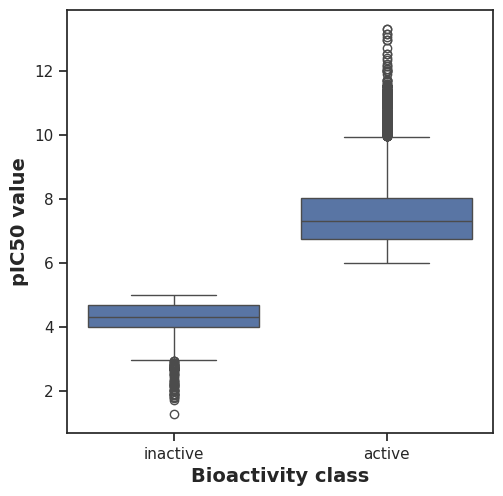

In [99]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [100]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [101]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,37244114.0,0.0,0.05,Different distribution (reject H0)


In [102]:
print(df_final['bioactivity_class'].value_counts())

bioactivity_class
active          11171
inactive         3334
intermediate     3015
Name: count, dtype: int64


In [103]:
from scipy.stats import mannwhitneyu

active = df_final[df_final['bioactivity_class']=='active']['pIC50']
inactive = df_final[df_final['bioactivity_class']=='inactive']['pIC50']

stat, p = mannwhitneyu(active, inactive)

print("Statistic:", stat, "p-value:", p)

Statistic: 37244114.0 p-value: 0.0


In [104]:
print(df_final['pIC50'].isnull().sum())  # check NaN count
print(df_final['bioactivity_class'].value_counts())  # check group sizes
print(df_final['pIC50'].dtype)  # should be float

176
bioactivity_class
active          11171
inactive         3334
intermediate     3015
Name: count, dtype: int64
float64


In [105]:
df_2class['bioactivity_class'] = df_2class['bioactivity_class'].astype(str)

/tmp/ipython-input-3128452167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class['bioactivity_class'] = df_2class['bioactivity_class'].astype(str)


In [106]:
df_2class = df_2class.dropna(subset=['pIC50', 'bioactivity_class'])

In [107]:
print(df_2class.head())
print(df_2class['bioactivity_class'].value_counts())

  molecule_chembl_id                            canonical_smiles       MW  \
0       CHEMBL296346                S=C(NCN1CCOCC1)Nc1ccc(Br)cn1  331.239   
1       CHEMBL318730            CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C  292.382   
2       CHEMBL303928         O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2  247.279   
3        CHEMBL68175      C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1  257.337   
4        CHEMBL69775  C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1  285.391   

      LogP  NumHDonors  NumHAcceptors     pIC50 bioactivity_class  
0  1.42020         2.0            4.0  5.000000          inactive  
1  4.42332         2.0            3.0  6.339998            active  
2  1.13990         3.0            4.0  4.000000          inactive  
3  2.28230         1.0            3.0  4.493495          inactive  
4  2.91840         1.0            3.0  4.899629          inactive  
bioactivity_class
active      11171
inactive     3334
Name: count, dtype: int64


In [108]:
from scipy.stats import mannwhitneyu

# Drop any rows with NaN in pIC50
df_clean = df_final.dropna(subset=['pIC50'])

# Separate the two groups
active = df_clean[df_clean['bioactivity_class'] == 'active']['pIC50']
inactive = df_clean[df_clean['bioactivity_class'] == 'inactive']['pIC50']

# Run Mann–Whitney U test
stat, p = mannwhitneyu(active, inactive)

print("Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Distributions are significantly different (reject H0)")
else:
    print("No significant difference (fail to reject H0)")

Statistic: 37244114.0
p-value: 0.0
Distributions are significantly different (reject H0)


In [109]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,37244114.0,0.0,0.05,Different distribution (reject H0)


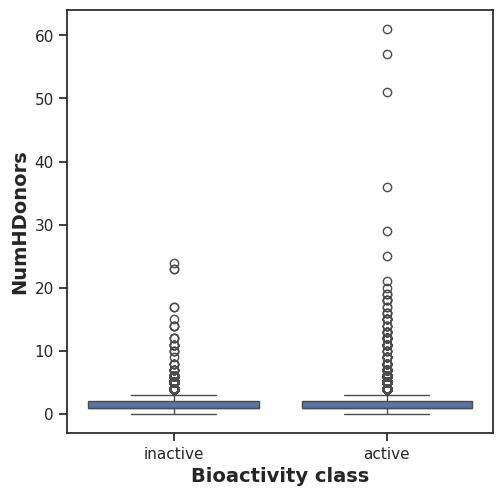

In [110]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [111]:
from scipy.stats import mannwhitneyu

def safe_mannwhitney(descriptor):
    # Drop NaN and inf
    df_clean = df_final[['bioactivity_class', descriptor]].replace([np.inf, -np.inf], np.nan).dropna()

    active = df_clean[df_clean['bioactivity_class']=='active'][descriptor]
    inactive = df_clean[df_clean['bioactivity_class']=='inactive'][descriptor]

    if len(active) < 1 or len(inactive) < 1:
        return pd.DataFrame({
            'Descriptor':[descriptor],
            'Statistics':[np.nan],
            'p':[np.nan],
            'alpha':[0.05],
            'Interpretation':['Not enough data']
        })

    stat, p = mannwhitneyu(active, inactive)

    return pd.DataFrame({
        'Descriptor':[descriptor],
        'Statistics':[stat],
        'p':[p],
        'alpha':[0.05],
        'Interpretation':['Different distribution (reject H0)' if p < 0.05 else 'Same distribution (fail to reject H0)']
    })

# Example usage
safe_mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,19667317.5,7.289036e-07,0.05,Different distribution (reject H0)


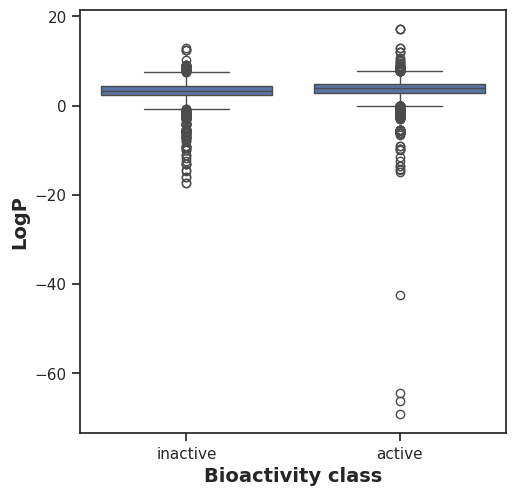

In [112]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [113]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,NaN,NaN,0.05,Different distribution (reject H0)


In [114]:
df_final.groupby('bioactivity_class')['LogP'].describe()


,count,mean,std,min,25%,50%,75%,max
bioactivity_class,,,,,,,,
active,11171.0,3.679194,2.265813,-69.07614,2.82895,3.93722,4.76074,17.1740
inactive,3333.0,3.047000,2.472000,-17.28980,2.29938,3.30028,4.39402,12.8930
intermediate,3012.0,3.410669,2.094222,-13.54330,2.53302,3.58446,4.58586,13.6063


In [115]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

def safe_mannwhitney(descriptor):
    # Clean data
    df_clean = df_final[['bioactivity_class', descriptor]].replace([np.inf, -np.inf], np.nan).dropna()

    active = df_clean[df_clean['bioactivity_class']=='active'][descriptor]
    inactive = df_clean[df_clean['bioactivity_class']=='inactive'][descriptor]

    # Check uniqueness
    if active.nunique() < 2 or inactive.nunique() < 2:
        return pd.DataFrame({
            'Descriptor':[descriptor],
            'Statistics':[np.nan],
            'p':[np.nan],
            'alpha':[0.05],
            'Interpretation':['Cannot compute: not enough unique values']
        })

    stat, p = mannwhitneyu(active, inactive)

    return pd.DataFrame({
        'Descriptor':[descriptor],
        'Statistics':[stat],
        'p':[p],
        'alpha':[0.05],
        'Interpretation':['Different distribution (reject H0)' if p < 0.05 else 'Same distribution (fail to reject H0)']
    })

safe_mannwhitney('LogP')



,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,22041924.0,1.192702e-58,0.05,Different distribution (reject H0)


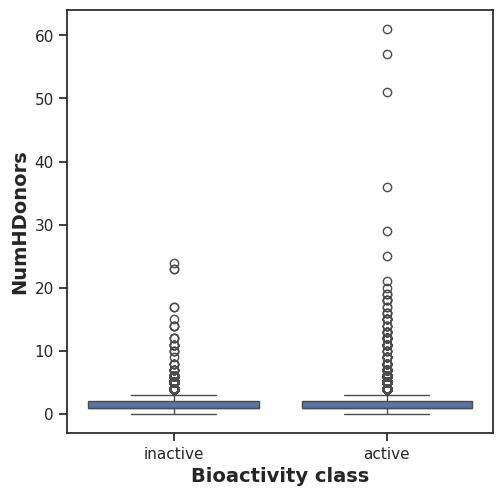

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [117]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,NaN,NaN,0.05,Different distribution (reject H0)


In [118]:
# Check uniqueness per group
print(df_final.groupby('bioactivity_class')['NumHDonors'].nunique())

# Check for NaN or infinite
print(df_final['NumHDonors'].isna().sum())
print(np.isinf(df_final['NumHDonors']).sum())

bioactivity_class
active          28
inactive        18
intermediate    18
Name: NumHDonors, dtype: int64
4
0


In [119]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

def safe_mannwhitney(descriptor):
    # Clean data
    df_clean = df_final[['bioactivity_class', descriptor]].replace([np.inf, -np.inf], np.nan).dropna()

    active = df_clean[df_clean['bioactivity_class']=='active'][descriptor]
    inactive = df_clean[df_clean['bioactivity_class']=='inactive'][descriptor]

    # Check uniqueness
    if active.nunique() < 2 or inactive.nunique() < 2:
        return pd.DataFrame({
            'Descriptor':[descriptor],
            'Statistics':[np.nan],
            'p':[np.nan],
            'alpha':[0.05],
            'Interpretation':['Cannot compute: not enough unique values']
        })

    stat, p = mannwhitneyu(active, inactive)

    return pd.DataFrame({
        'Descriptor':[descriptor],
        'Statistics':[stat],
        'p':[p],
        'alpha':[0.05],
        'Interpretation':['Different distribution (reject H0)' if p < 0.05 else 'Same distribution (fail to reject H0)']
    })

safe_mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,18582797.0,0.867597,0.05,Same distribution (fail to reject H0)


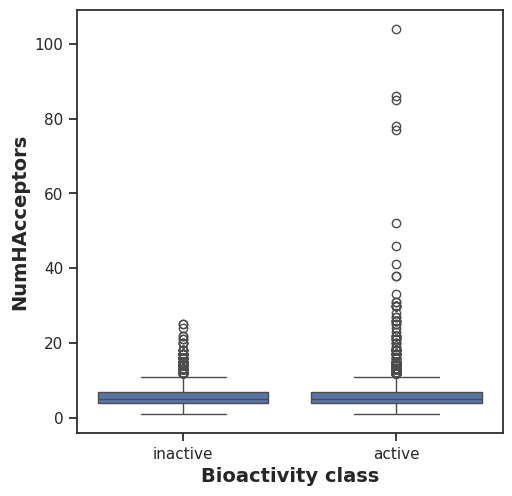

In [120]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [121]:
from scipy.stats import mannwhitneyu
import pandas as pd
import numpy as np

def safe_mannwhitney(descriptor):
    # Clean data: remove NaN and infinite values
    df_clean = df_final[['bioactivity_class', descriptor]].replace([np.inf, -np.inf], np.nan).dropna()

    active = df_clean[df_clean['bioactivity_class'] == 'active'][descriptor]
    inactive = df_clean[df_clean['bioactivity_class'] == 'inactive'][descriptor]

    # Check if both groups have at least 2 unique values
    if active.nunique() < 2 or inactive.nunique() < 2:
        return pd.DataFrame({
            'Descriptor':[descriptor],
            'Statistics':[np.nan],
            'p':[np.nan],
            'alpha':[0.05],
            'Interpretation':['Cannot compute: not enough unique values']
        })

    # Perform Mann–Whitney U test
    stat, p = mannwhitneyu(active, inactive)
    interpretation = 'Different distribution (reject H0)' if p < 0.05 else 'Same distribution (fail to reject H0)'

    return pd.DataFrame({
        'Descriptor':[descriptor],
        'Statistics':[stat],
        'p':[p],
        'alpha':[0.05],
        'Interpretation':[interpretation]
    })

# Run for NumHAcceptors
safe_mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,17623084.5,0.000002,0.05,Different distribution (reject H0)


In [122]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

descriptors = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']
results = []

for desc in descriptors:
    # Clean data: remove NaN and infinite values
    df_clean = df_final[['bioactivity_class', desc]].replace([np.inf, -np.inf], np.nan).dropna()

    active = df_clean[df_clean['bioactivity_class'] == 'active'][desc]
    inactive = df_clean[df_clean['bioactivity_class'] == 'inactive'][desc]

    # Check if both groups have at least 2 unique values
    if active.nunique() < 2 or inactive.nunique() < 2:
        results.append({
            'Descriptor': desc,
            'Statistics': np.nan,
            'p': np.nan,
            'alpha': 0.05,
            'Interpretation': 'Cannot compute: not enough unique values'
        })
        continue

    # Perform Mann–Whitney U test
    stat, p = mannwhitneyu(active, inactive)
    interpretation = 'Different distribution (reject H0)' if p < 0.05 else 'Same distribution (fail to reject H0)'

    results.append({
        'Descriptor': desc,
        'Statistics': stat,
        'p': p,
        'alpha': 0.05,
        'Interpretation': interpretation
    })

# Convert results to DataFrame
df_mannwhitney = pd.DataFrame(results)
df_mannwhitney


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,19667317.5,7.289036e-07,0.05,Different distribution (reject H0)
1,LogP,22041924.0,1.192702e-58,0.05,Different distribution (reject H0)
2,NumHDonors,18582797.0,8.675969e-01,0.05,Same distribution (fail to reject H0)
3,NumHAcceptors,17623084.5,2.196145e-06,0.05,Different distribution (reject H0)
4,pIC50,37244114.0,0.000000e+00,0.05,Different distribution (reject H0)


In [123]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_LogP.pdf (deflated 31%)
updating: mannwhitneyu_LogP.csv (deflated 6%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: bioactivity_data.csv (deflated 93%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 35%)
updating: mannwhitneyu_MW.csv (deflated 6%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: plot_MW_vs_LogP.pdf (deflated 1%)
updating: mannwhitneyu_pIC50.csv (deflated 8%)
updating: plot_ic50.pdf (deflated 31%)
updating: plot_NumHAcceptors.pdf (deflated 36%)
updating: bioactivity_preprocessed_data.csv (deflated 87%)
  adding: HIV1_RT_descriptors1.csv (deflated 85%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)


In [124]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [125]:
# Select only the relevant columns
df_export = df_final[['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']]

# Optionally, rename 'bioactivity_class' to 'class' to match your desired column names
df_export.rename(columns={'bioactivity_class': 'class'}, inplace=True)

# Check first few rows
df_export.head()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,331.239,1.42020,2.0,4.0,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,292.382,4.42332,2.0,3.0,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,247.279,1.13990,3.0,4.0,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,257.337,2.28230,1.0,3.0,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,285.391,2.91840,1.0,3.0,4.899629


In [126]:
from google.colab import files

# Save CSV
df_export.to_csv('HIV1_RT_descriptors1.csv', index=False)

# Download file
files.download('HIV1_RT_descriptors1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
import pandas as pd

In [128]:
df3 = pd.read_csv('HIV1_RT_descriptors1.csv')

In [129]:
df3

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,331.239,1.42020,2.0,4.0,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,292.382,4.42332,2.0,3.0,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,247.279,1.13990,3.0,4.0,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,257.337,2.28230,1.0,3.0,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,285.391,2.91840,1.0,3.0,4.899629
...,...,...,...,...,...,...,...,...
17515,CHEMBL2037378,CC(=O)NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,inactive,862.746,-1.09560,12.0,18.0,4.193820
17516,CHEMBL5413305,N[C@@H](Cc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c...,intermediate,NaN,NaN,NaN,NaN,5.091515
17517,CHEMBL5416177,NCCc1ccc(O)c(-c2c(O)c(O)c3c(c2O)C(=O)c2c(cc(O)...,inactive,NaN,NaN,NaN,NaN,4.356547
17518,CHEMBL5407832,O=C(O)c1cc(O)c2c(c1)[C@@H]([C@@H]1c3cc(C(=O)O)...,intermediate,NaN,NaN,NaN,NaN,5.698970


In [130]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [131]:
! cat molecule.smi | head -5

S=C(NCN1CCOCC1)Nc1ccc(Br)cn1	CHEMBL296346
CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C	CHEMBL318730
O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2	CHEMBL303928
C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1	CHEMBL68175
C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1	CHEMBL69775


In [132]:
! cat molecule.smi | wc -l

17520


In [133]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd

descriptor_funcs = {
    'MW': Descriptors.MolWt,
    'LogP': Descriptors.MolLogP,
    'NumHDonors': Lipinski.NumHDonors,
    'NumHAcceptors': Lipinski.NumHAcceptors,
}

def compute_descriptors(smiles_list):
    data = []
    valid_ids = []
    for idx, smi in enumerate(smiles_list):
        if pd.isna(smi):  # skip missing
            continue
        mol = Chem.MolFromSmiles(str(smi))
        if mol:
            row = [func(mol) for func in descriptor_funcs.values()]
            data.append(row)
            valid_ids.append(idx)
    df = pd.DataFrame(data, columns=descriptor_funcs.keys())
    return df, valid_ids


Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:
  Successfully uninstalled numpy-1.21.5
Found existing installation: rdkit-pypi 2022.9.5
Uninstalling rdkit-pypi-2022.9.5:
  Successfully uninstalled rdkit-pypi-2022.9.5


Found existing installation: numpy 1.20.3
Uninstalling numpy-1.20.3:
  Successfully uninstalled numpy-1.20.3
  Using cached numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.3 MB)


  Using cached rdkit_pypi-2021.9.5.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (22.3 MB)


In [6]:
# Install RDKit in Colab
!pip install --quiet rdkit-pypi

In [2]:
# 1️⃣ Install Miniconda
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# 2️⃣ Add Conda to PATH
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

# 3️⃣ Install RDKit from conda-forge
!conda install -c conda-forge rdkit -y

--2025-09-01 04:48:59--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking bootstrapper...
Unpacking payload...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local
Jupyter detected...

CondaToSNonInteractive

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

mol = Chem.MolFromSmiles("CCO")
print(mol)

ModuleNotFoundError: No module named 'rdkit'

In [136]:
conda create -n chem python=3.10
conda activate chem
pip install numpy==1.23.5 rdkit-pypi==2021.9.5.1

SyntaxError: invalid syntax (ipython-input-4135409263.py, line 1)